# AlifTech test task

## Loading datasets

#### transactions dataset

In [1]:
import csv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
transactions_data = pd.read_csv('transactions.csv', encoding='cp1251', sep=',')
transactions_data.head(10)

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,9:30:36
1,178,55.055995,82.912991,17:49:50,17:54:24
2,178,0.000000,0.000000,9:34:47,9:31:22
3,178,55.056034,82.912734,17:49:50,17:43:01
4,178,55.056034,82.912734,17:49:50,17:45:17
5,178,0.000000,0.000000,10:25:10,10:29:56
6,178,0.000000,0.000000,13:48:53,13:47:54
7,178,55.055995,82.912991,17:49:50,17:51:34
8,267,55.741642,37.502628,15:34:28,15:32:51
9,267,55.707007,37.582190,23:42:30,23:36:34


Checking for missed data:

In [2]:
transactions_data.isnull().sum(axis=0)

merchant_id              0
latitude                 0
longitude                0
real_transaction_dttm    0
record_date              0
dtype: int64

Probably **transactions_data** have a lot of missed geolocational fields with zero values, let's check for them:

In [3]:
print('Zero latitude records:', 
      transactions_data[transactions_data['latitude']==0].shape[0])
print('Zero longitude records:', 
      transactions_data[transactions_data['longitude']==0].shape[0])
print('Total records:', transactions_data.shape[0])

Zero latitude records: 25018
Zero longitude records: 25028
Total records: 249353


Near 10% of **transactions_data** records contain missed geolocational data. Probably thy could be inplaced by means for the same ID, or the same ID and nearest time, or using K-means. Now we have no any explanation about this dataset, so we have no reason to do this inplacement.

#### merchants_train and merchants_test datasets

In [4]:
merchants_data = pd.read_csv('merchants_train.csv', encoding='cp1251', sep=';')
merchants_data.head(10)

,merchant_id,latitude,longitude
0,178,55.055553,82.911833
1,267,55.726877,37.579645
2,357,54.706402,20.471420
3,505,64.553811,40.551964
4,532,55.768355,49.217176
5,628,55.744500,37.630176
6,785,59.933816,30.322417
7,1120,51.541568,46.014206
8,1509,55.752485,37.623196
9,1690,59.955038,30.361305


In [5]:
merchants_data.shape

(6482, 3)

In [6]:
merchants_data_test = pd.read_csv('merchants_test.csv', encoding='cp1251', sep=';')
merchants_data_test.head(10)

,merchant_id,latitude,longitude
0,361,NaN,NaN
1,428,NaN,NaN
2,490,NaN,NaN
3,1175,NaN,NaN
4,1239,NaN,NaN
5,1476,NaN,NaN
6,1601,NaN,NaN
7,1628,NaN,NaN
8,1676,NaN,NaN
9,1916,NaN,NaN


In [7]:
merchants_data_test.shape

(3524, 3)

In [8]:
merchants_data_test.isnull().sum(axis=0)

merchant_id       0
latitude       3524
longitude      3524
dtype: int64

All geolocational data in **merchants_test** dataset are missed. I think, this is not proper ML task to predict geolocational data by just merchant ID. Taking in account, that also this ID-s differ from **merchants_train** dataset, so this datasets could not be merged properly

#### credit_train and credit_test datasets

In [9]:
credit_data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')
credit_data.head(10)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0
5,6,F,37,MAR,SPC,"26788,00",10,1.1,"0,484203",SCH,СТАВРОПОЛЬСКИЙ КРАЙ,30000.0,0.0,0.0,0
6,7,M,34,MAR,SPC,"10317,00",6,1.5,"0,276012",SCH,ОБЛ НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
7,8,F,26,UNM,SPC,"47878,00",10,1.1,"0,512525",GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
8,9,M,23,UNM,SPC,"37577,16",12,1.6,"0,642267",SCH,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,50000.0,3.0,0.0,0
9,10,F,32,UNM,SPC,"26268,00",10,1.1,"0,465026",GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


In [10]:
credit_data.shape

(170746, 15)

In [11]:
credit_data_test = pd.read_csv('credit_test.csv', encoding='cp1251', sep=';')
credit_data_test.head(10)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,170747,F,48,MAR,UMN,"16558,00",10,1.10,"0,370409",GRD,ХАКАСИЯ РЕСП,34000,2.0,0.0
1,170748,M,29,MAR,SPC,"7028,72",6,1.40,"0,377281",SCH,ОБЛ КЕМЕРОВСКАЯ,19000,3.0,0.0
2,170749,F,20,UNM,SPC,"13019,00",10,1.60,"0,538515",SCH,ОБЛ БЕЛГОРОДСКАЯ,25000,1.0,0.0
3,170750,F,41,MAR,SPC,"9379,00",10,1.10,"0,482520",GRD,ОБЛ ИРКУТСКАЯ,30000,0.0,0.0
4,170751,F,31,MAR,SPC,"13990,00",6,1.43,"0,485914",GRD,ОБЛ КИРОВСКАЯ,20000,2.0,0.0
5,170752,M,37,CIV,INP,"18255,00",12,1.40,"0,795377",UGR,ОБЛ АМУРСКАЯ,40000,2.0,0.0
6,170753,F,38,MAR,UMN,"38647,00",10,1.10,"0,354040",GRD,ХАНТЫ-МАНСИЙСКИЙ АО,29000,2.0,0.0
7,170754,F,57,UNM,SPC,"33457,00",10,1.10,"0,414596",SCH,ТУЛЬСКАЯ ОБЛ,24000,2.0,0.0
8,170755,F,45,MAR,SPC,"16339,00",12,1.10,"0,476120",SCH,РОСТОВСКАЯ ОБЛАСТЬ,55000,7.0,0.0
9,170756,F,26,MAR,SPC,"16919,00",10,1.60,"0,570206",UGR,ЯМАЛО-НЕНЕЦКИЙ АО,20000,1.0,0.0


In [12]:
credit_data_test.shape

(91940, 14)

**credit_train** dataset looks like suitable for ML. We can predict **open_account_flg** as binary output, using other data fields as predictors. Column names are self-descriptive enough to understand basic data structure. **open_account_flg** in **credit_test** dataset is missed, this is strong support for our hypothesis. 
Credit datasets probably are independant from other merchants and transactions datasets, perhaps there is no obvious way to merge them. So we can try to use just **credit_train** data to train ML model for predictiong whether to approve credit or not. 

### Exploring credit_train dataset

In [13]:
credit_data.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum               object
credit_month              int64
tariff_id               float64
score_shk                object
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

Dropping client ID column

In [14]:
credit_data = credit_data.drop(columns = ['client_id'])

### Replacing missed values

In [15]:
credit_data.isnull().sum(axis=0)

gender                     0
age                        0
marital_status             0
job_position               0
credit_sum                 0
credit_month               0
tariff_id                  0
score_shk                  0
education                  0
living_region            192
monthly_income             1
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

Missed credit count and overdue credit count fields probably could be filled by zeros. Other approach is to label them as categorical features, but it could create problems for constructing new features.

In [16]:
credit_data['credit_count'] = credit_data['credit_count'].fillna(0)
credit_data['overdue_credit_count'] = credit_data['overdue_credit_count'].fillna(0)

Region could be filled by special "undefined" region category

In [17]:
credit_data['living_region'] = credit_data['living_region'].fillna('undefined')

Monthly income is a very important feature. If this value is missed, it's better to set it to minimum value (but not zero). Other alternative is to replace by some regional mean value

In [18]:
credit_data['monthly_income'] = credit_data['monthly_income'].fillna(min(credit_data['monthly_income']))

#### Let's check that all missed values are inplaced:

In [19]:
credit_data.isnull().sum(axis=0)

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

## Converting data types

In [20]:
credit_data.dtypes

gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum               object
credit_month              int64
tariff_id               float64
score_shk                object
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

Converting to categories

In [21]:
categorical_columns = [ 'gender', 'marital_status', 'job_position', 
                       'tariff_id', 'education']
for i in categorical_columns:
    credit_data[i]=credit_data[i].astype("category")

Credit_sum and score_shk are not numerical, decimal commas should be replaced by decimal points

In [22]:
credit_data['credit_sum']=[x.replace(',', '.') for x in credit_data['credit_sum']]
credit_data['score_shk']=[x.replace(',', '.') for x in credit_data['score_shk']]
credit_data['credit_sum']=credit_data['credit_sum'].astype('float')
credit_data['score_shk']=credit_data['score_shk'].astype('float')

In [23]:
credit_data.head(5)

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000.0,2.0,0.0,0
2,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [24]:
credit_data.dtypes

gender                  category
age                        int64
marital_status          category
job_position            category
credit_sum               float64
credit_month               int64
tariff_id               category
score_shk                float64
education               category
living_region             object
monthly_income           float64
credit_count             float64
overdue_credit_count     float64
open_account_flg           int64
dtype: object

### Basic descriptive statistics

In [25]:
credit_data.describe()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497283,26095.047799,10.980749,0.469473,40138.082561,1.993394,0.043579,0.176028
std,10.546008,16234.794320,3.536698,0.124268,25044.276366,1.792914,0.206014,0.380845
min,18.000000,2736.000000,3.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,28.000000,14908.000000,10.000000,0.379495,25000.000000,1.000000,0.000000,0.000000
50%,34.000000,21229.000000,10.000000,0.461599,35000.000000,2.000000,0.000000,0.000000
75%,43.000000,32068.000000,12.000000,0.552419,50000.000000,3.000000,0.000000,0.000000
max,71.000000,200000.000000,36.000000,1.128291,950000.000000,21.000000,3.000000,1.000000


#### Ratio of open_account_flg status in whole population

In [26]:
credit_data['open_account_flg'].value_counts(normalize=True)

0    0.823972
1    0.176028
Name: open_account_flg, dtype: float64

Probably, open_account_flg=1 means that credit is declined. If otherwise, fraction of accepted credits seems to be too low for real business.

#### Gender proportions

In [27]:
credit_data[['gender']].value_counts(normalize=True)

gender
F         0.519468
M         0.480532
dtype: float64

Gender distribution looks similar to actual population

In [28]:
# Function, that returns statistics, grouped by column
def print_confirmed_ratio_by(column = 'gender'):
    record_list = []
    for i in set(credit_data[column]):
        data = credit_data[credit_data[column]==i]
        count = data['open_account_flg'].value_counts()[0]    
        ratio = '{:.3f}'.format(data['open_account_flg'].value_counts(normalize=True)[0])
        record_list.append({column: i, 'total_count':data.shape[0], 
                           'accepted_count': count, 'ratio': ratio})
    return pd.DataFrame(record_list).set_index(column)

In [29]:
gender_stat = print_confirmed_ratio_by('gender')
gender_stat

,total_count,accepted_count,ratio
gender,,,
F,88697,74522,0.840
M,82049,66168,0.806


Women have higher credit confirmation ratio. Let's check it with proportion A/B testing:

In [30]:
from statsmodels.stats.proportion import proportions_ztest
accepted_count = gender_stat['accepted_count']
total_count = gender_stat['total_count']
z_stst, pval = proportions_ztest(count=accepted_count, nobs=total_count, alternative='two-sided')
print('P-value:',  pval)

P-value: 9.807436684938763e-75


P-value is extremely small, proportion gender difference is statistically significant (but maybe not significant practically).

#### Marital status proportions

In [31]:
marital_stat = print_confirmed_ratio_by('marital_status')
marital_stat

,total_count,accepted_count,ratio
marital_status,,,
MAR,93956,79588,0.847
DIV,16970,13880,0.818
CIV,4196,3350,0.798
UNM,52149,41133,0.789
WID,3475,2739,0.788


Let's check, that credit acceptance level for married is statistically different from unmarried

In [32]:
accepted_count = [marital_stat['accepted_count']['UNM'], marital_stat['accepted_count']['MAR']]

total_count = [marital_stat['total_count']['UNM'], marital_stat['total_count']['MAR']]
z_stst, pval = proportions_ztest(count=accepted_count, nobs=total_count, alternative='two-sided')
print('P-value:',  pval)

P-value: 8.412743786586703e-175


P-value is extremely small, so difference is statistically significant. So all this features are useful for ML model

#### Education proportions

In [33]:
print_confirmed_ratio_by('education')

,total_count,accepted_count,ratio
education,,,
PGR,565,457,0.809
GRD,72594,62464,0.860
ACD,107,82,0.766
SCH,87539,69583,0.795
UGR,9941,8104,0.815


Obviously, proportions for graduated are higher than for people with just school education

#### Exploring job position and tariff_id fields

In [34]:
credit_data['job_position'].value_counts()

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64

In [35]:
credit_data[['tariff_id']].value_counts()

tariff_id
1.1          69355
1.6          39117
1.32         15537
1.4          10970
1.5           7497
1.9           5538
1.43          3930
1.3           3339
1.16          3232
1.0           2245
1.44          2228
1.19          2102
1.2           1306
1.7           1007
1.17           717
1.21           579
1.94           414
1.22           376
1.23           370
1.91           317
1.24           303
1.41           132
1.25            56
1.18            36
1.26            11
1.28            10
1.52             7
1.27             6
1.48             5
1.56             2
1.96             1
1.29             1
dtype: int64

We can see some rare cases with just a few observations. Any defference would not be statistically significant for such small group. We should group rare data points to some aggregate class. We can calculate approximate minimum number of observations we need to find statistically significant difference we want.

In [36]:
# First, let's define that we want 95% confidence so z_val is 1.96
z_val = 1.96

# Second, let's define practically significant difference petween proportions we want to find, for example 0.5%
delta_min = 0.005

# Third, find actual population proportion from dataset:
p = credit_data['open_account_flg'].value_counts(normalize=True)[0]
q = credit_data['open_account_flg'].value_counts(normalize=True)[1]

# We can find minimum sample as:
sample_min = (z_val*(p*q)**0.5)/delta_min
sample_min

149.29069314617354

So we need more than 150 observations for detecting more than 0.5% probability difference with 95% confidence. We can group together data from categories with lower number of observations

#### Exploring regions

In [37]:
credit_data['living_region'].value_counts(normalize=True)

ОБЛ МОСКОВСКАЯ        0.071615
КРАСНОДАРСКИЙ КРАЙ    0.043673
САНКТ-ПЕТЕРБУРГ       0.032985
МОСКВА                0.032381
ТАТАРСТАН РЕСП        0.030378
                        ...   
ОБЛ.САРАТОВСКАЯ       0.000006
КЕМЕРОВСКАЯ           0.000006
ОБЛ.РОСТОВСКАЯ        0.000006
КРАЙ.ПЕРМСКИЙ         0.000006
ОБЛ. ЧЕЛЯБИНСКАЯ      0.000006
Name: living_region, Length: 302, dtype: float64

In [38]:
set(credit_data['living_region'])

{'74',
 '98',
 'undefined',
 'АДЫГЕЯ РЕСП',
 'АЛТАЙСКИЙ',
 'АЛТАЙСКИЙ КРАЙ',
 'АМУРСКАЯ ОБЛ',
 'АМУРСКАЯ ОБЛАСТЬ',
 'АО НЕНЕЦКИЙ',
 'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю',
 'АО ЯМАЛО-НЕНЕЦКИЙ',
 'АОБЛ ЕВРЕЙСКАЯ',
 'АРХАНГЕЛЬСКАЯ',
 'АРХАНГЕЛЬСКАЯ ОБЛ',
 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ',
 'АСТРАХАНСКАЯ',
 'АСТРАХАНСКАЯ ОБЛ',
 'АСТРАХАНСКАЯ ОБЛАСТЬ',
 'БАШКОРТОСТАН',
 'БАШКОРТОСТАН РЕСП',
 'БЕЛГОРОДСКАЯ ОБЛ',
 'БЕЛГОРОДСКАЯ ОБЛАСТЬ',
 'БРЯНСКАЯ ОБЛ',
 'БРЯНСКАЯ ОБЛАСТЬ',
 'БРЯНСКИЙ',
 'БУРЯТИЯ',
 'БУРЯТИЯ РЕСП',
 'ВЛАДИМИРСКАЯ ОБЛ',
 'ВЛАДИМИРСКАЯ ОБЛАСТЬ',
 'ВОЛГОГРАДСКАЯ ОБЛ',
 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
 'ВОЛОГОДСКАЯ',
 'ВОЛОГОДСКАЯ ОБЛ',
 'ВОЛОГОДСКАЯ ОБЛ.',
 'ВОЛОГОДСКАЯ ОБЛАСТЬ',
 'ВОРОНЕЖСКАЯ ОБЛ',
 'ВОРОНЕЖСКАЯ ОБЛАСТЬ',
 'Г МОСКВА',
 'Г. МОСКВА',
 'Г. САНКТ-ПЕТЕРБУРГ',
 'Г.МОСКВА',
 'Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ',
 'ГОРЬКОВСКАЯ ОБЛ',
 'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н',
 'ДАГЕСТАН РЕСП',
 'ДАЛЬНИЙ ВОСТОК',
 'ЕВРЕЙСКАЯ АВТОНОМНАЯ',
 'ЕВРЕЙСКАЯ АОБЛ',
 'ЗАБАЙКАЛЬСКИЙ КРАЙ',
 'ИВАНОВСКАЯ ОБЛ',
 'ИВАНОВС

We can see a lot of duplicated region names with different abbreviations. Dataset should be cleaned before further living region analysis, by grouping similar regions together using pre-defined rules or regex

# Exploratory analysis

### Gender-Age structure

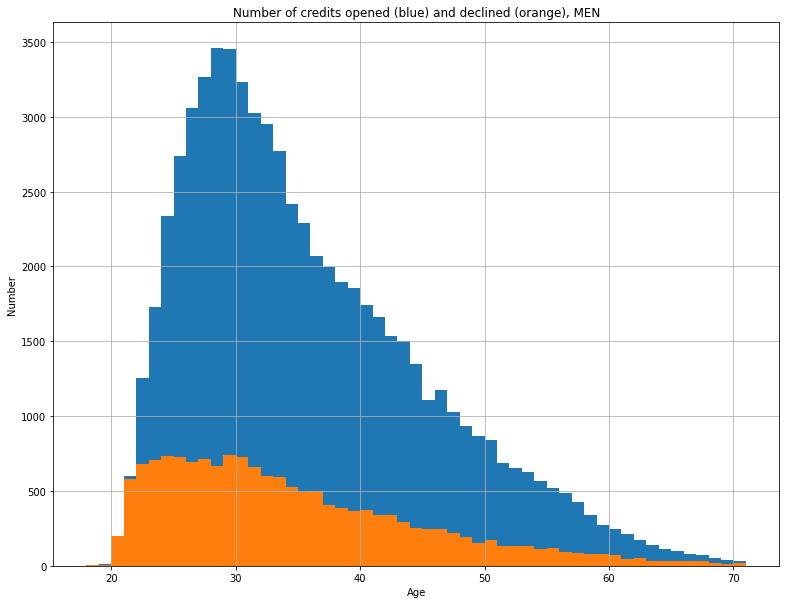

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_title('Number of credits opened (blue) and declined (orange), MEN')
ax.set_xlabel('Age')
ax.set_ylabel('Number')

data_male = credit_data[credit_data['gender']=="M"]

plt.hist(data_male[data_male['open_account_flg']==0]['age'], bins=53)
plt.hist(data_male[data_male['open_account_flg']==1]['age'], bins=53)    
plt.grid()
plt.show()

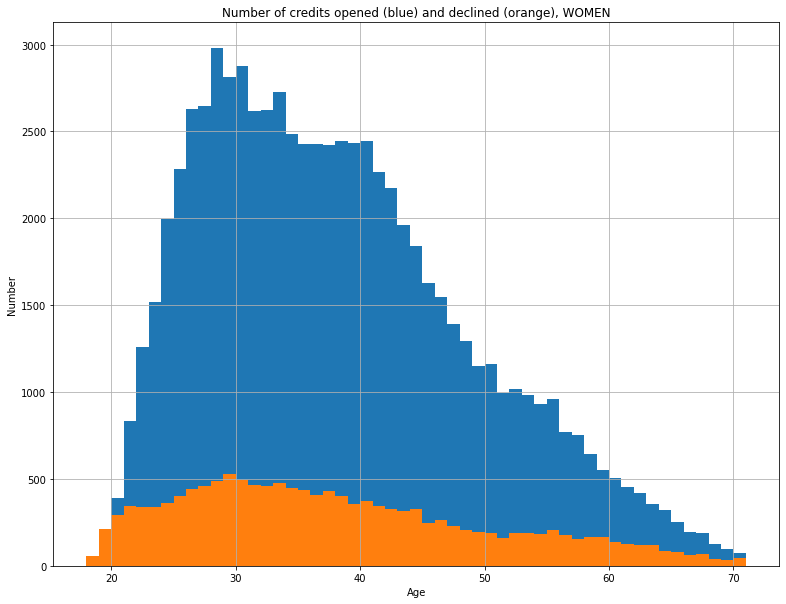

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_title('Number of credits opened (blue) and declined (orange), WOMEN')
ax.set_xlabel('Age')
ax.set_ylabel('Number')

data_male = credit_data[credit_data['gender']=="F"]

plt.hist(data_male[data_male['open_account_flg']==0]['age'], bins=53)
plt.hist(data_male[data_male['open_account_flg']==1]['age'], bins=53)    
plt.grid()
plt.show()

We can see different age structure for men and women. Men distribution has high peak near 28 years. Women distribution has some plateau from 30 to 40 years. We can see, that credit is rarely approved for age 18-21. And also approvement rate is sufficiently lower for age 65+.

### Credit sum - income structure

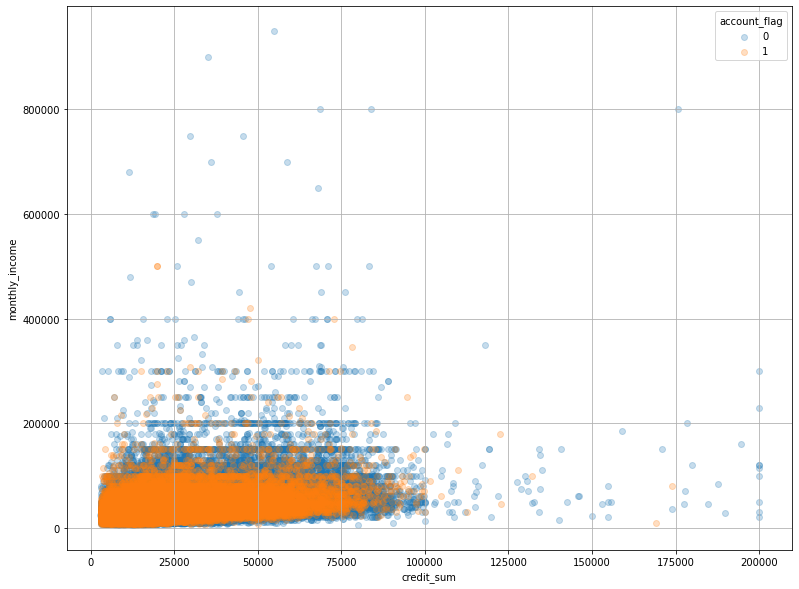

In [41]:
colormap = plt.cm.get_cmap('gist_rainbow')

fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_xlabel('credit_sum')
ax.set_ylabel('monthly_income')

for i in set(credit_data['open_account_flg']):
    plt.scatter('credit_sum', 'monthly_income', data = credit_data[credit_data['open_account_flg']==i],
            marker='o', cmap=colormap, label = i, alpha=0.25)
    
plt.grid()
ax.legend(title="account_flag", loc='upper right')
plt.show()

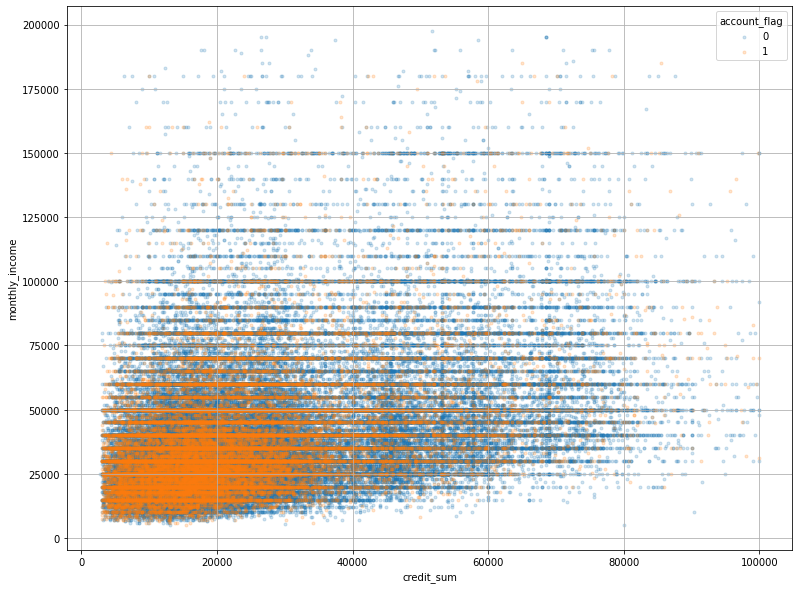

In [42]:
data_filtered = credit_data[(credit_data['credit_sum']<100000) & (credit_data['monthly_income']<200000)]

fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_xlabel('credit_sum')
ax.set_ylabel('monthly_income')

for i in set(credit_data['open_account_flg']):
    plt.scatter('credit_sum', 'monthly_income', data = data_filtered[data_filtered['open_account_flg']==i],
            marker='.', cmap=colormap, label = i, alpha=0.2)
    
plt.grid()
ax.legend(title="account_flag", loc='upper right')
plt.show()

We can see, that income variable has often discrete levels by 5000, this may be useful for creating bins.
Most data points are located in lower income - lower credit sum region. Among the same income level, big credit sums are accepted more often. Probably, we shoud take in account not just credit sum, byt monthly payments.

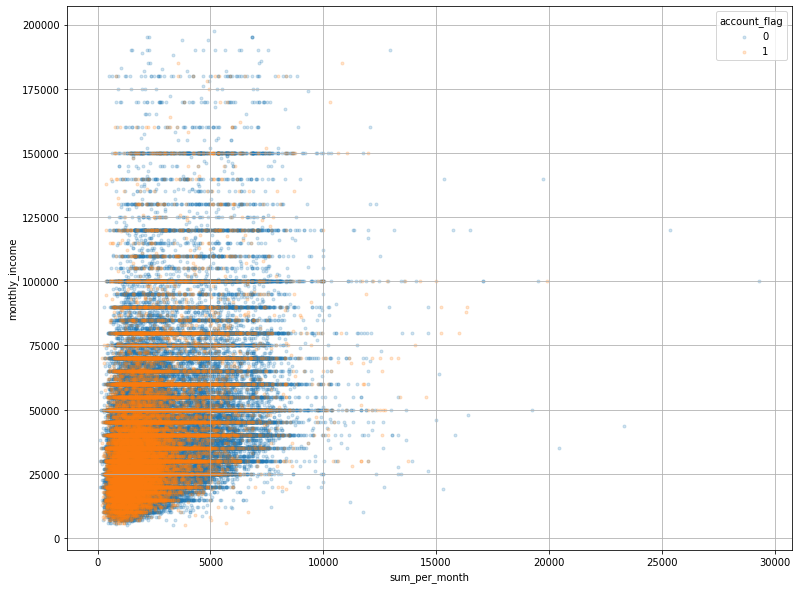

In [43]:
data_filtered = credit_data[(credit_data['credit_sum']<100000) & (credit_data['monthly_income']<200000)]
data_filtered['sum_per_month'] = credit_data['credit_sum']/credit_data['credit_month']
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax.set_xlabel('sum_per_month')
ax.set_ylabel('monthly_income')

for i in set(credit_data['open_account_flg']):
    plt.scatter('sum_per_month', 'monthly_income', data = data_filtered[data_filtered['open_account_flg']==i],
            marker='.', cmap=colormap, label = i, alpha=0.2)
    
plt.grid()
ax.legend(title="account_flag", loc='upper right')
plt.show()

We can see pattern, that the lower montly income, the more often credit is not accepted. It's interesting, that zone of credit acceptance is wider than "core of decline".

### Gender-income distribution

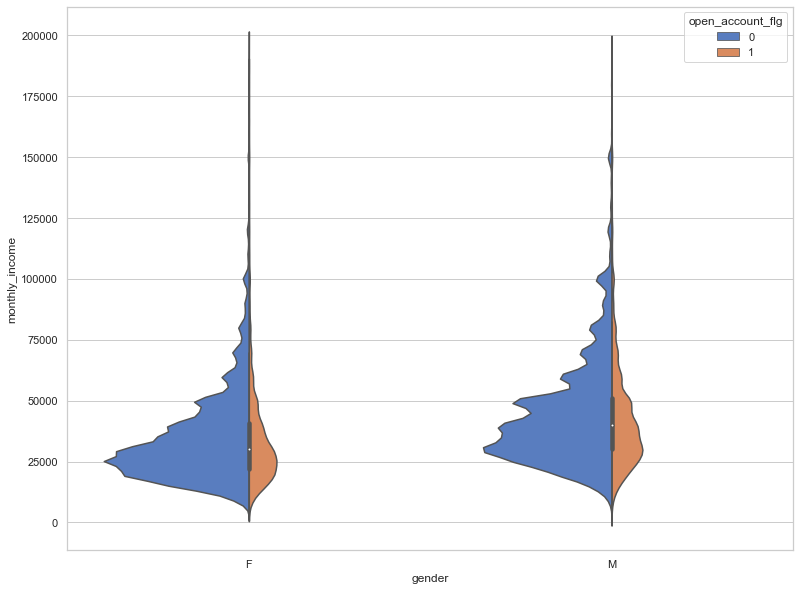

In [44]:
import seaborn as sns
sns.set_theme(style='whitegrid')

data_filtered = credit_data[credit_data['monthly_income']<200000]

fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax = sns.violinplot(x='gender', y='monthly_income', data=data_filtered, hue='open_account_flg', 
                    split=True, palette="muted", scale="count", scale_hue=False)

We can see some irregular income distribution for accepted credits, and much smoother lines for declined. Also we can see monthly income distribution irregularities, which are smoother for declined credits, probably because there are less data points. Distributional peaks are close to each other. Also monthly income for men is higher then for women.

### Education-income distributions

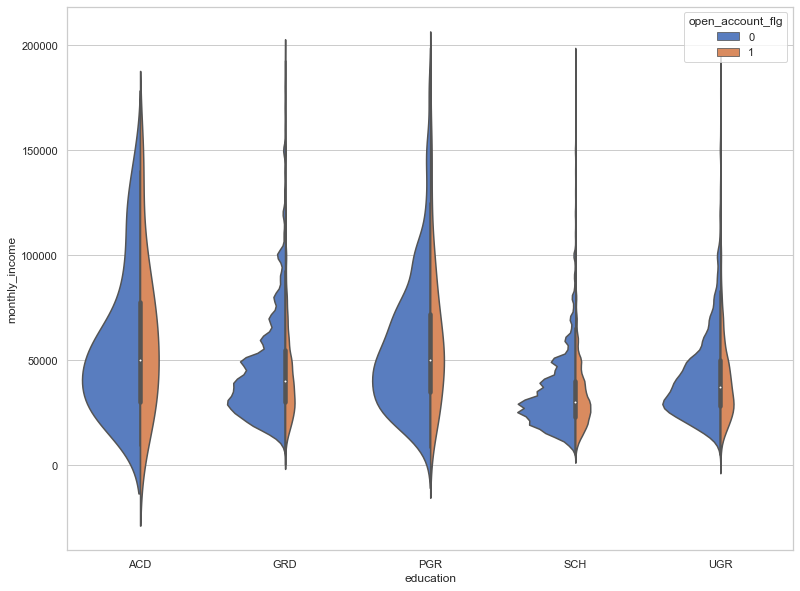

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax = sns.violinplot(x='education', y='monthly_income', data=data_filtered, hue='open_account_flg', 
                    split=True, palette="muted", scale="count")

We can see income differences, caused by educational level, features are dependant.

### Marital status-income distribution

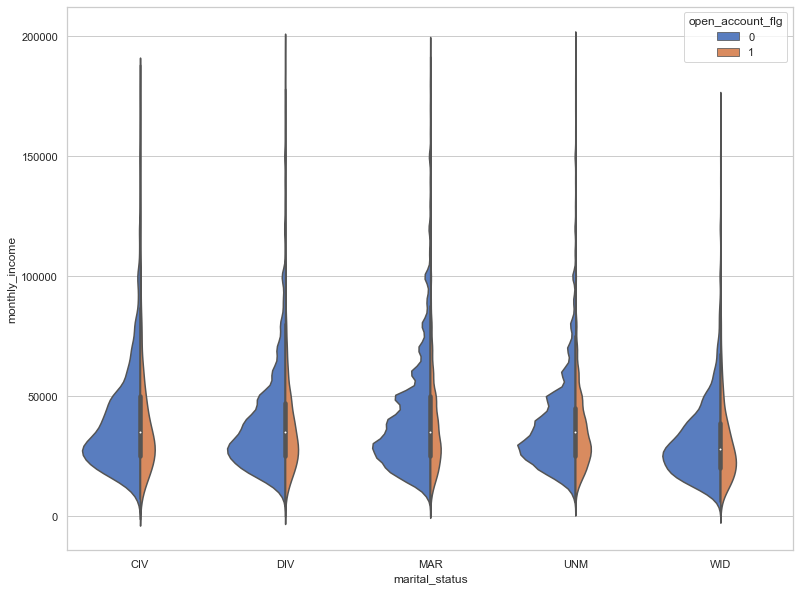

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 10)
ax = sns.violinplot(x='marital_status', y='monthly_income', data=data_filtered, hue='open_account_flg', 
                    split=True, palette="muted", scale="count")

Looks like there is no strong relation between marital status and monthly income

## Data preparation

#### Removing rare categories

As we mentioned above, rare data points in all categories with count less than 150 should be re-assigned to "other" class

In [47]:
credit_data['tariff_id'] = credit_data['tariff_id'].astype('str')
credit_data.loc[credit_data['tariff_id'].value_counts()[credit_data['tariff_id']].values < 150, 'tariff_id'] = '0.0'

In [48]:
credit_data.dtypes

gender                  category
age                        int64
marital_status          category
job_position            category
credit_sum               float64
credit_month               int64
tariff_id                 object
score_shk                float64
education               category
living_region             object
monthly_income           float64
credit_count             float64
overdue_credit_count     float64
open_account_flg           int64
dtype: object

In [49]:
cat_columns = [ 'gender', 'marital_status', 'job_position', 
                       'tariff_id', 'education', 'living_region']
for i in cat_columns:
        credit_data[i] = credit_data[i].astype('str')
        credit_data.loc[credit_data[i].value_counts()[credit_data[i]].values < 150, i] = 'other'

#### Creating new features

In [50]:
# Monthly payment feature
credit_data['monthly_pay'] = credit_data['credit_sum'] / credit_data['credit_month']

# Monthly payment vs monthly income ratio
credit_data['pay_ratio'] = credit_data['monthly_pay'] / credit_data['monthly_income']

# Credits returned ratio
credit_data['overdue_ratio'] = credit_data['overdue_credit_count'] / credit_data['credit_count']

# Filling NaNs for zero credit count case with -1
credit_data['overdue_ratio'] = credit_data['overdue_ratio'].fillna(-1)

#### Splitting test and train datasets

In [51]:
from sklearn.model_selection import train_test_split
y = credit_data['open_account_flg']
X = credit_data.drop(columns=['open_account_flg'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)

#### One-hot encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder

# get encoded column names
cat_cols_encoded = []
for col in cat_columns:
    cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(X_train[col].unique())]

# create encoder
oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype = 'int32')
encoded_cols = oh_encoder.fit_transform(X_train[cat_columns])

# encode train dataset
df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded, index = X_train.index)
X_train = pd.concat([X_train.drop(columns = cat_columns), df_enc], axis="columns")

# encode test dataset
encoded_cols_test = oh_encoder.transform(X_test[cat_columns])
df_enc = pd.DataFrame(encoded_cols_test, columns=cat_cols_encoded, index = X_test.index)
X_test = pd.concat([X_test.drop(columns = cat_columns), df_enc], axis="columns")

# saving encoder for use in app
import pickle
pickle.dump(oh_encoder, open('one_hot_encoder', 'wb'))
pickle.dump(cat_cols_encoded, open('encoded_colnames', 'wb'))

In [53]:
X_train.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,monthly_pay,pay_ratio,overdue_ratio,...,l_МОСКОВСКАЯ ОБЛАСТЬ,l_ОМСКАЯ ОБЛАСТЬ,l_ОБЛ РОСТОВСКАЯ,l_ТОМСКАЯ ОБЛАСТЬ,l_ХАКАСИЯ РЕСП,l_ТВЕРСКАЯ ОБЛАСТЬ,l_РЕСП. САХА (ЯКУТИЯ),l_РЯЗАНСКАЯ ОБЛАСТЬ,l_ТОМСКАЯ ОБЛ,l_ОРЕНБУРГСКАЯ ОБЛАСТЬ
156453,40,7530.85,6,0.217839,25000.0,0.0,0.0,1255.141667,0.050206,-1.0,...,0,0,0,0,1,0,0,0,0,0
154370,23,22790.00,7,0.416659,50000.0,1.0,0.0,3255.714286,0.065114,0.0,...,0,0,0,0,0,0,0,0,0,0
161240,33,37390.00,6,0.359115,120000.0,0.0,0.0,6231.666667,0.051931,-1.0,...,0,0,0,0,0,0,0,0,0,0
138282,59,16729.00,12,0.303254,18000.0,2.0,0.0,1394.083333,0.077449,0.0,...,0,0,0,0,0,0,0,0,0,0
10268,33,30468.00,10,0.445683,45000.0,7.0,0.0,3046.800000,0.067707,0.0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_test.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,monthly_pay,pay_ratio,overdue_ratio,...,l_МОСКОВСКАЯ ОБЛАСТЬ,l_ОМСКАЯ ОБЛАСТЬ,l_ОБЛ РОСТОВСКАЯ,l_ТОМСКАЯ ОБЛАСТЬ,l_ХАКАСИЯ РЕСП,l_ТВЕРСКАЯ ОБЛАСТЬ,l_РЕСП. САХА (ЯКУТИЯ),l_РЯЗАНСКАЯ ОБЛАСТЬ,l_ТОМСКАЯ ОБЛ,l_ОРЕНБУРГСКАЯ ОБЛАСТЬ
61168,28,16900.0,12,0.465936,20000.0,1.0,0.0,1408.333333,0.070417,0.0,...,0,0,0,0,0,0,0,0,0,0
4611,51,10229.0,10,0.587106,25000.0,1.0,0.0,1022.900000,0.040916,0.0,...,0,0,0,0,0,0,0,0,0,0
5584,56,6829.0,10,0.332878,37400.0,5.0,0.0,682.900000,0.018259,0.0,...,0,0,0,0,0,0,0,0,0,0
78464,55,21736.0,12,0.363283,19000.0,1.0,0.0,1811.333333,0.095333,0.0,...,0,0,0,0,0,0,0,0,0,0
15325,38,13378.0,12,0.394678,15000.0,0.0,0.0,1114.833333,0.074322,-1.0,...,0,0,0,0,0,0,0,0,0,0


## Training models

### Selecting metric

This is binary classification task, so we should select metric for success. We could not select accuracy, because classes are skewed. Also we don't know domain well enough to say whether precision or recall is preferred.
Area under precision-recall curve looks like the best metric for this case, so user could deal with probability output from the model and select treshold that best matches business goals.

### Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, precision_score

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict_proba(X_train)[:, 1]
y_pred_test = classifier.predict_proba(X_test)[:, 1]

print("AUC score for train data: ", roc_auc_score(y_train, y_pred_train))
print("AUC score for test data: ", roc_auc_score(y_test.array, y_pred_test))

AUC score for train data:  0.6875138259476159
AUC score for test data:  0.6843812222074264


Naive Bayes gives us good starting point to evaluate efficiency of other more complicated models

### Logistic regression

For improving logistic regression results, features should be scaled:

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_scaled, y_train)
y_pred_train = classifier.predict_proba(X_train_scaled)[:, 1]
y_pred_test = classifier.predict_proba(X_test_scaled)[:, 1]

print("AUC score for train data: ", roc_auc_score(y_train, y_pred_train))
print("AUC score for test data: ", roc_auc_score(y_test.array, y_pred_test))

AUC score for train data:  0.7189262912177854
AUC score for test data:  0.7150156015696514


Logistic regresssion results are slightly better than Naive Bayes, also there is no overfitting

### Desicion tree classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=2022)
 
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict_proba(X_train)[:, 1]
y_pred_test = classifier.predict_proba(X_test)[:, 1]

print("AUC score for train data: ", roc_auc_score(y_train, y_pred_train))
print("AUC score for test data: ", roc_auc_score(y_test, y_pred_test))

AUC score for train data:  0.9999974975498622
AUC score for test data:  0.563527691228278


Desicion tree classifier results with default setting are sufficiently worse than Naive Bayes and overfits training data. We should tune hyperparameters for model improvement.

### Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, 
                                    max_depth=15, max_features=15, 
                                    n_jobs=-1, random_state=2022)
 
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=15, n_estimators=500,
                       n_jobs=-1, random_state=2022)

In [60]:
y_pred_train = classifier.predict_proba(X_train)[:, 1]
y_pred_test = classifier.predict_proba(X_test)[:, 1]

print("AUC score for train data: ", roc_auc_score(y_train, y_pred_train))
print("AUC score for test data: ", roc_auc_score(y_test, y_pred_test))

AUC score for train data:  0.8439744099032425
AUC score for test data:  0.7562138346732885


Random forest tends to overfit model, but have better AUC score result.

### Hyperparameter tuning

Hyperparameter tuning of complicated models is computationaly expensive, so in this section we would just provide an example of tuning DecisionTreeClassifier

In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix

clf = DecisionTreeClassifier(random_state=2022)

param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 7, 10, 13, 15],
    'min_samples_leaf': [10, 50, 100]
}

In [62]:
def grid_search_wrapper():
    
    grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc',
                           cv=3, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)
    y_pred = grid_search.predict(X_test.values)

    print('Best params')
    print(grid_search.best_params_)
    
    return grid_search

In [63]:
grid_search_clf = grid_search_wrapper()

Best params
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}


In [64]:
y_pred_train = grid_search_clf.predict_proba(X_train)[:, 1]
y_pred_test = grid_search_clf.predict_proba(X_test)[:, 1]

print("AUC score for train data: ", roc_auc_score(y_train, y_pred_train))
print("AUC score for test data: ", roc_auc_score(y_test, y_pred_test))

AUC score for train data:  0.7520566114168923
AUC score for test data:  0.7380395978721954


Other metrics for DecisionTreeClassifier best fit:

In [65]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)
print("Precision score for train data: ", precision_score(y_train, y_pred_train))
print("Precision score for test data: ", precision_score(y_test, y_pred_test))
print("Recall score for train data: ", recall_score(y_train, y_pred_train))
print("Recall score for test data: ", recall_score(y_test, y_pred_test))

Precision score for train data:  0.9610091743119266
Precision score for test data:  0.7457627118644068
Recall score for train data:  0.05580713905167821
Recall score for test data:  0.02336696760488582


We can see, that model precision and recall scores practically are quite low. Customer should prioritize single metric, taking into account business goals, and also define minimum metric score which is appropriate for achieving this goals.

In [66]:
#Saving best model for use in APP
pickle.dump(grid_search_clf, open('model', 'wb'))